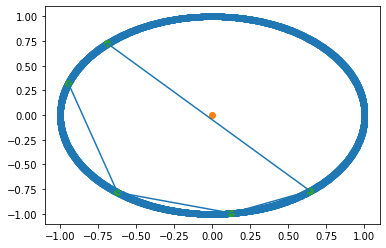

False

In [243]:
import math
from math import pi
from statistics import mean, stdev
import matplotlib.pyplot as plt
import random
import itertools
import shapely.geometry as shapely

class Circle:
    def __init__(self, radius=1, n_points=2000):
        self.n_points_in_circle = n_points
        self.circle = [(math.cos(2*pi/n_points*point)*radius,math.sin(2*pi/n_points*point)*radius) for point in range(0,n_points+1)]

    def draw_circle(self):
        y = [i[1] for i in c.circle]
        x = [i[0] for i in c.circle]
        plt.scatter(x, y)
        plt.scatter(0,0)

    def draw_chosen_points(self):
        y_points = [i[1] for i in self.points]
        x_points = [i[0] for i in self.points]
        plt.scatter(x_points, y_points)

    def draw_lines_between_chosen_points(self):
        x_points = [i[0] for i in self.points]
        y_points = [i[1] for i in self.points]
        # Add the first point last in the list to close the polygon
        x_points.append(x_points[0])
        y_line_points = y_points
        y_points.append(y_points[0])
        plt.plot(x_points, y_points)
    
    def draw(self):
        self.draw_circle()
        self.draw_chosen_points()
        self.draw_lines_between_chosen_points()
        plt.show()
    
    def get_random_points_from_circle(self, n_points=3):
        if n_points > self.n_points_in_circle:
            raise Exception('The chosen number of points cannot be more than the total amount of points in the circle')
        points = random.sample(self.circle, n_points)
        # Sort points to create an 'open' polygon, i.e. the lines of
        # the polygon should not cross
        self.points = self.sort_points(points)
        return self.points

    def sort_points(self, points):
        indices_and_points = list()
        for point in points:
            idx = self.circle.index(point)
            indices_and_points.append((idx, point))
        sorted_indices_and_points = sorted(indices_and_points)
        return [i[1] for i in sorted_indices_and_points]
        
class Polygon:
    def __init__(self, points):
        self.polygon = shapely.Polygon(points)
    
    def is_point_inside_polygon(self, point=(0,0)):
        point_of_interest = shapely.Point(point)
        return self.polygon.contains(point_of_interest)


c = Circle()
points = c.get_random_points_from_circle(n_points=5)
c.draw()
p = Polygon(points)
p.is_point_inside_polygon()

Number of points chosen on the circle: 3
Probability of origo lying inside the polygon is 0.253±0.011
Number of points chosen on the circle: 4
Probability of origo lying inside the polygon is 0.506±0.008
Number of points chosen on the circle: 5
Probability of origo lying inside the polygon is 0.693±0.016
Number of points chosen on the circle: 6
Probability of origo lying inside the polygon is 0.816±0.014
Number of points chosen on the circle: 7
Probability of origo lying inside the polygon is 0.888±0.009
Number of points chosen on the circle: 8
Probability of origo lying inside the polygon is 0.937±0.01
Number of points chosen on the circle: 9
Probability of origo lying inside the polygon is 0.965±0.013
Number of points chosen on the circle: 10
Probability of origo lying inside the polygon is 0.979±0.005
Number of points chosen on the circle: 11
Probability of origo lying inside the polygon is 0.99±0.003
Number of points chosen on the circle: 12
Probability of origo lying inside the po

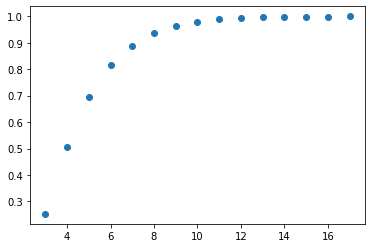

In [240]:
def main():
    n_runs = 1000
    mean_probabilities = list()
    stdevs = list()
    c = Circle()
    n_points = 2
    mean_prob = 0
    std = 1
    while mean_prob < 1 and std > 0:
        n_points += 1
        print('Number of points chosen on the circle: {}'.format(n_points))
        probabilities = list()
        for run in range(5):
            count = 0
            for i in range(n_runs):
                points = c.get_random_points_from_circle(n_points)
                p = Polygon(points)
                result = p.is_point_inside_polygon()
                if result:
                    count+= 1
            probabilities.append(count/n_runs)
        mean_prob = round(mean(probabilities), 3)
        std = round(stdev(probabilities), 3)
        mean_probabilities.append(mean_prob)
        stdevs.append(std)
        print('Probability of origo lying inside the polygon is {}±{}'.format(mean_prob, std))
    x = range(3, 3+ len(mean_probabilities))
    y = mean_probabilities
    plt.scatter(x, y)
    plt.show()
    return x, y

x,y = main()

In [244]:
#Trying to fit the curve
from scipy.optimize import curve_fit
import numpy as np

def func(x, a, b):
    return a*np.sqrt(x) + b

popt, pcurve = curve_fit(func, x, y, method='lm')
print(popt)


[0.2511525  0.09441717]


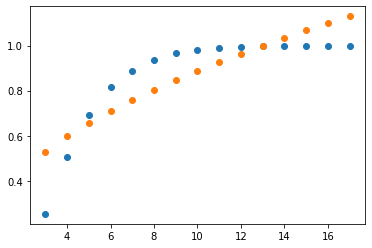

In [245]:
a = popt[0]
b = popt[1]
plt.scatter(x, y)
plt.scatter(x, func(x, *popt))
plt.show()